In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [13]:
Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
#see columns in the measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [25]:
#see columns in the station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [29]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [100]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [113]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
yearago

# Perform a query to retrieve the data and precipitation scores
dateandprcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= yearago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dateandprcpdf = pd.DataFrame(dateandprcp)
dateandprcpdf.set_index("date", inplace=True)
dateandprcpdf.dropna(inplace=True)

# Sort the dataframe by date
dateandprcpdf.sort_index(ascending=True)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


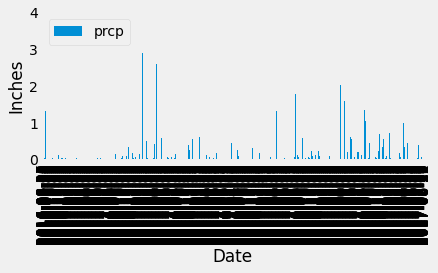

In [186]:
# Use Pandas Plotting with Matplotlib to plot the data
dateandprcpdf.plot.bar()
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.ylim(0, 4)
plt.grid()
plt.show()

In [86]:
# Use Pandas to calculate the summary statistics for the precipitation data
Prcp_summary = dateandprcpdf["prcp"].describe()
Prcp_summary

count    2688.000000
mean        0.138549
std         0.411545
min         0.000000
25%         0.000000
50%         0.010000
75%         0.090000
max         5.040000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [117]:
# Design a query to calculate the total number stations in the dataset
totalstations = session.query(Station).distinct().count()
print(totalstations)

9


In [187]:
totalstationsnames = session.query(Station)
for stationname in totalstationsnames:
    print(stationname.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [145]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [157]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activestationmean = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(activestationmean)

[(71.66378066378067,)]


In [158]:
activestationmax = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(activestationmax)

[(85.0,)]


In [159]:
activestationmin = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(activestationmin)

[(54.0,)]


In [173]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
activestationlastyear = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= yearago).all()
print(activestationlastyear)

[(77.0, '2016-08-23'), (77.0, '2016-08-24'), (80.0, '2016-08-25'), (80.0, '2016-08-26'), (75.0, '2016-08-27'), (73.0, '2016-08-28'), (78.0, '2016-08-29'), (77.0, '2016-08-30'), (78.0, '2016-08-31'), (80.0, '2016-09-01'), (80.0, '2016-09-02'), (78.0, '2016-09-03'), (78.0, '2016-09-04'), (78.0, '2016-09-05'), (73.0, '2016-09-06'), (74.0, '2016-09-07'), (80.0, '2016-09-08'), (79.0, '2016-09-09'), (77.0, '2016-09-10'), (80.0, '2016-09-11'), (76.0, '2016-09-12'), (79.0, '2016-09-13'), (75.0, '2016-09-14'), (79.0, '2016-09-15'), (78.0, '2016-09-16'), (79.0, '2016-09-17'), (78.0, '2016-09-18'), (78.0, '2016-09-19'), (76.0, '2016-09-20'), (74.0, '2016-09-21'), (77.0, '2016-09-22'), (78.0, '2016-09-23'), (79.0, '2016-09-24'), (79.0, '2016-09-25'), (77.0, '2016-09-26'), (80.0, '2016-09-27'), (78.0, '2016-09-28'), (78.0, '2016-09-29'), (78.0, '2016-09-30'), (77.0, '2016-10-01'), (79.0, '2016-10-02'), (79.0, '2016-10-03'), (79.0, '2016-10-04'), (79.0, '2016-10-05'), (75.0, '2016-10-06'), (76.0, '2

In [175]:
activestationlastyeardf = pd.DataFrame(activestationlastyear)
activestationlastyeardf.set_index("date", inplace=True)
activestationlastyeardf.dropna(inplace=True)
activestationlastyeardf

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


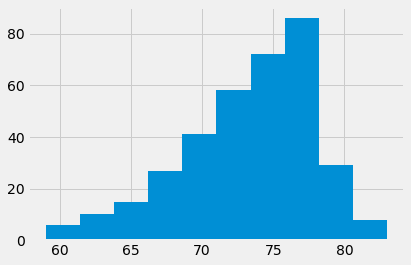

In [176]:
#create histogram
plt.hist(activestationlastyeardf)
plt.show() 

# Close session

In [188]:
# Close Session
session.close()